# Project Scope
Load, clean, and analyze data looking for trends in the kinds of species and their conservation statuses.

# Loading and checking data

In [1]:
#Loading data:
import pandas as pd
import seaborn as sns
sns.set_palette("GnBu", 5)
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [2]:
#Checking heads to get a sense of the data:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Notes: There are some nulls in the conservation_status varible. Also, some species have more than one common name.

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
#Now looking at some summary statisitcs:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


Notes: The majority of species have a null conservation status. This could mean (and we would hope!) that most of them are not endangered. We will need to determine whether or not to include this null cases in our analysis.

In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


Notes: The datatypes seem to make sense.

In [6]:
species.describe(include = 'all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


Notes: There are fewer scientific names than common ones. This suggests there could be duplicates that need to be handled before merging datasets. As suspected earlier, the species with conservation statuses make up a small percentage of the total (3.4%). It would be interesting to see how this percentage varies by category. 

In [7]:
observations.describe(include = 'all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


Notes: Species have multiple observations recorded data points with a maximum number of counts is 12. It would be interesting to see have observations relate to conversation status, both by species and with all species taken together. Any outliers could suggest species that need further attention.

# Looking closer at NaN conservation statuses, dealing with duplicates, merging datasets

In [8]:
#To check if NaN relates to species with no conservation status I will replace NaN with 'No Status' and check the mean osbservation counts.
species['conservation_status'] = species.conservation_status.fillna('No Status')
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [9]:
#Next I will look at the potential duplicates in the species table.
species.scientific_name.duplicated().any()

True

In [10]:
#There are some duplicates. looking at duplicate records
species[species.scientific_name.duplicated(keep = False)].sort_values('scientific_name')

,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",No Status
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,No Status
2134,Vascular Plant,Agrostis gigantea,Redtop,No Status
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",No Status
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",No Status
...,...,...,...,...
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",No Status
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,No Status
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",No Status
3347,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",No Status


Notes: It does look like multiple common names per scientific_name are causing the duplicates. These should be safe to drop.

In [11]:
species = species.drop_duplicates(subset = 'scientific_name')
species.scientific_name.duplicated().any()

False

In [12]:
#Now the datasets should be ready to merge so we can compare conservation statuses to obervations
df = pd.merge(observations, species, on = 'scientific_name', how = 'left')
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Status
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Status
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Status
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Status
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Status


Notes: I merged on the left with observations on the left to preserve all of the records.

In [13]:
print(df.count(), observations.count())

scientific_name        23296
park_name              23296
observations           23296
category               23296
common_names           23296
conservation_status    23296
dtype: int64 scientific_name    23296
park_name          23296
observations       23296
dtype: int64


Notes: As expected the merged data has the same number of rows as the observations dataset.

In [14]:
#With the datasets merged next I will make a dataframe of mean observations. This should be a good way to detect trends. 
mean_obs = df[['scientific_name', 'common_names', 'observations', 'conservation_status', 'category']].groupby(['conservation_status', 'category', 'common_names', 'scientific_name']).mean('observations').reset_index()
mean_obs

,conservation_status,category,common_names,scientific_name,observations
0,Endangered,Amphibian,Sierra Nevada Yellow-Legged Frog,Rana sierrae,36.00
1,Endangered,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Vermivora bachmanii,35.25
2,Endangered,Bird,California Condor,Gymnogyps californianus,39.00
3,Endangered,Bird,Red-Cockaded Woodpecker,Picoides borealis,36.50
4,Endangered,Bird,Whooping Crane,Grus americana,32.75
...,...,...,...,...,...
5536,Threatened,Fish,Yellowfin Madtom,Noturus flavipinnis,72.25
5537,Threatened,Mammal,Grizzly Bear,Ursus arctos horribilis,69.00
5538,Threatened,Mammal,"Northern Long-Eared Bat, Northern Myotis",Myotis septentrionalis,75.50
5539,Threatened,Vascular Plant,Small Whorled Pogonia,Isotria medeoloides,68.50


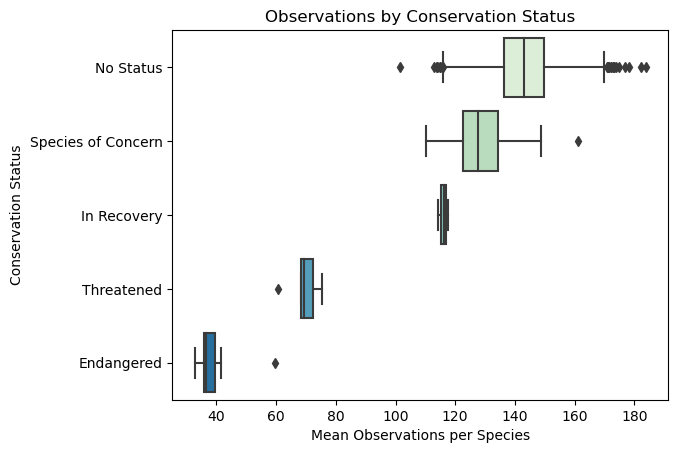

In [15]:
#Now lets look at the mean observations per conservation status.
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data = mean_obs, y = 'conservation_status', x = 'observations', order = ['No Status', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'])
plt.title('Observations by Conservation Status')
plt.ylabel('Conservation Status')
plt.xlabel('Mean Observations per Species')
plt.show()

Conclusions: 
-The 'No Status' does seem to correspond to species with the greater number of mean observations. <br>
-Likewise, the other statuses also seem to correlate as would be expected with the mean observations. The fewer mean observations correspond to more severe statuses. <br>
-Interestingly, there seems to be a fair bit of overlap with the 'No Status' and 'Sepcies of Concern populations. It might be worth looking in the the 'No Status' outliers more and see if there are any indications that some of the species might need to be reclassifed as 'Species of Concern'. There are likely many factors that go into the determining the conservation status. <br>
-Also, it would be interesting to see how/if these statuses differ between species categories and possibly parks as well. 


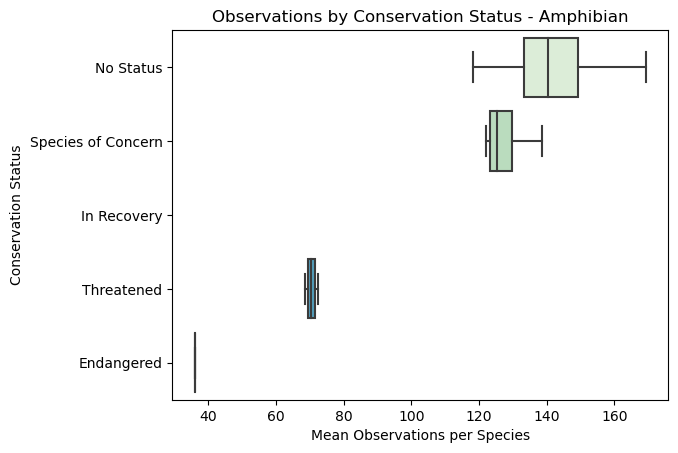

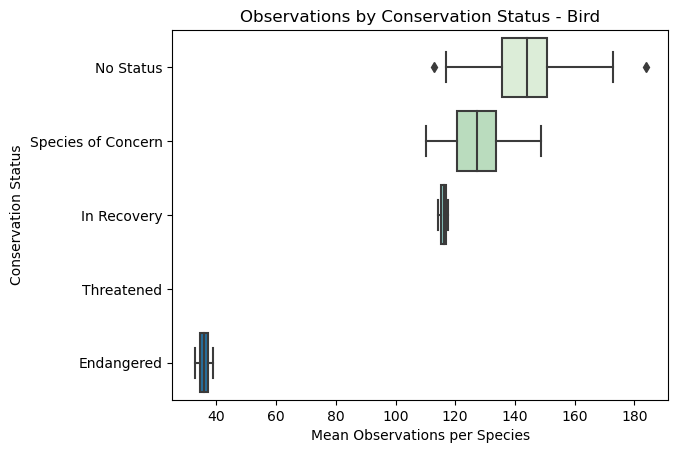

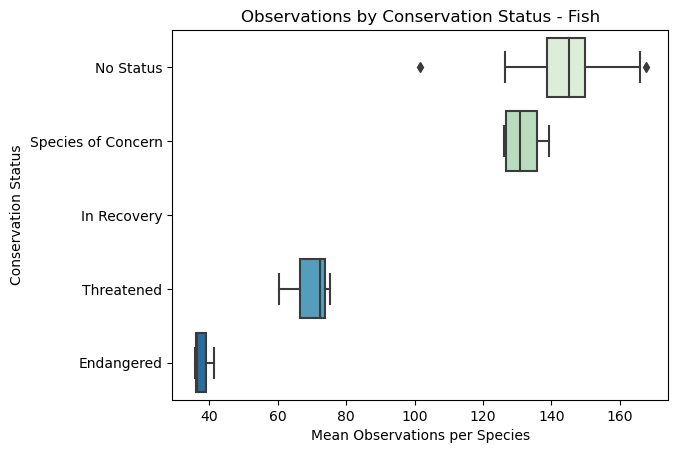

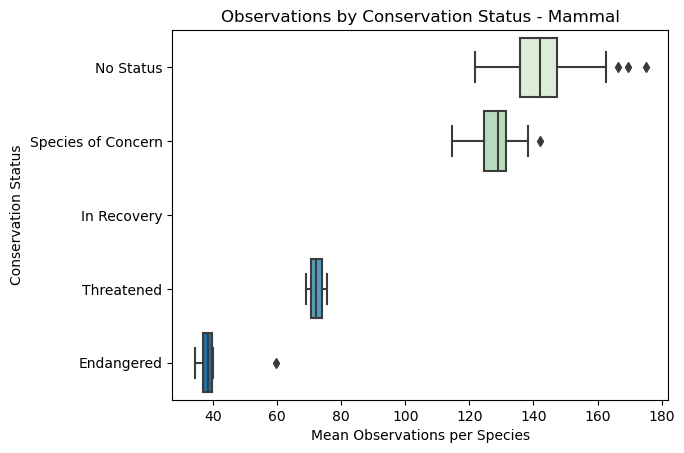

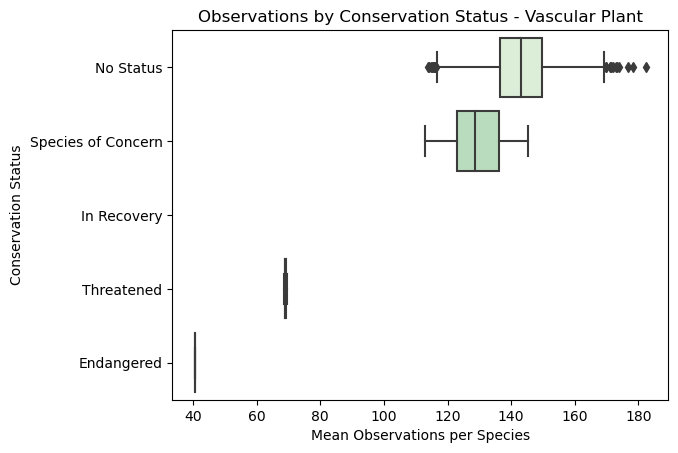

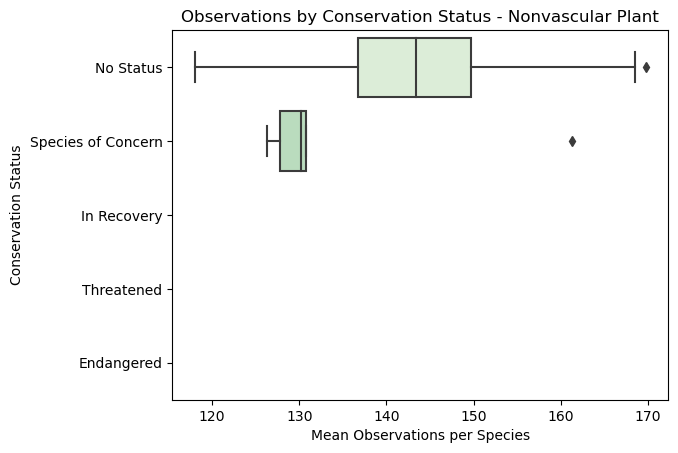

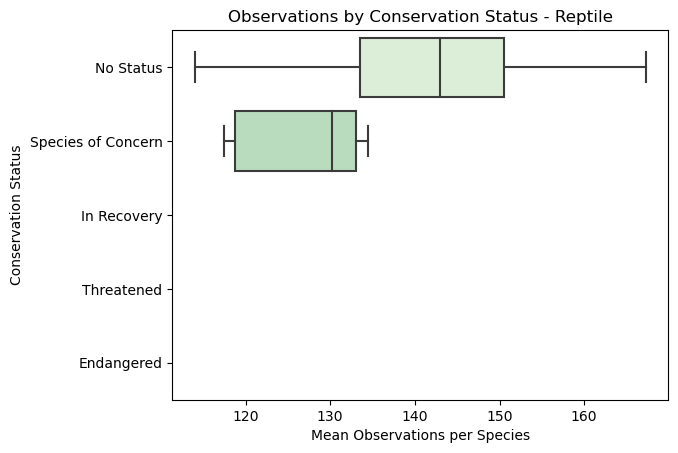

<Figure size 640x480 with 0 Axes>

In [16]:
#First here is the break down by category (species type):
categories = mean_obs.category.unique()
for category in categories:
    
    sns.boxplot(data = mean_obs[mean_obs.category == '{category}'.format(category=category)], y = 'conservation_status', x = 'observations', order = ['No Status', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'])
    plt.title('Observations by Conservation Status - {category}'.format(category=category))
    plt.ylabel('Conservation Status')
    plt.xlabel('Mean Observations per Species')
    plt.show()
    plt.clf()

Conclusions: There is definitely a fair amount of variation among the conservation statuses assigned to the different types of species. Both reptiles and nonvasulcar plants only have 'No Status or 'Species of Concern'. Birds are the only species with an 'In recovery' status, while mammals, fish, amphibians, and vascular plants have every status except for 'In recovery'. 

In [17]:
#Next let's look in terms of percentage of total species per category. 
#This should give a sense of if any catorgies are more prone to particular statuses than others.
status_by_category = mean_obs.groupby(['category', 'conservation_status']).count().reset_index()
status_by_category.rename(columns = {"scientific_name" : "number_in_status"}, inplace = True)
status_by_category = status_by_category[['category', 'conservation_status', 'number_in_status']]
total_by_category = mean_obs.groupby('category').count().reset_index()
total_by_category.rename(columns = {"conservation_status" : "total"}, inplace = True)
total_by_category = total_by_category[['category', 'total']]
status_by_category = pd.merge(status_by_category, total_by_category, how = 'left', on = 'category')
status_by_category['percentage_in_status'] = status_by_category['number_in_status'] / status_by_category['total']
status_by_category

,category,conservation_status,number_in_status,total,percentage_in_status
0,Amphibian,Endangered,1,79,0.012658
1,Amphibian,No Status,72,79,0.911392
2,Amphibian,Species of Concern,4,79,0.050633
3,Amphibian,Threatened,2,79,0.025316
4,Bird,Endangered,4,488,0.008197
5,Bird,In Recovery,3,488,0.006148
6,Bird,No Status,413,488,0.846311
7,Bird,Species of Concern,68,488,0.139344
8,Fish,Endangered,3,125,0.024000
9,Fish,No Status,115,125,0.920000


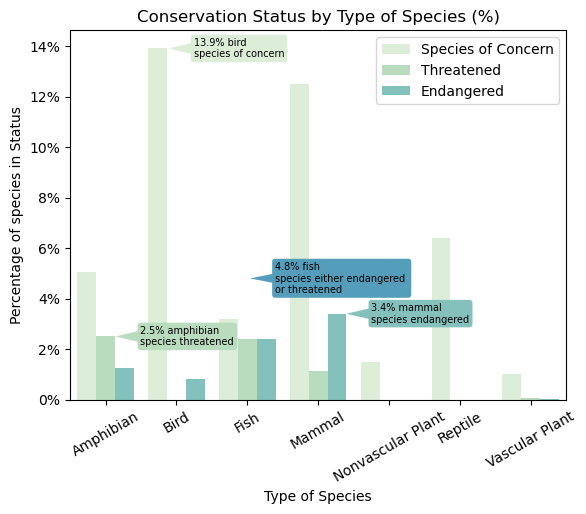

In [112]:
ax = plt.subplot()
sns.barplot(data = status_by_category[(status_by_category.conservation_status != 'No Status') & 
                                      (status_by_category.conservation_status != 'In Recovery')], 
            x = 'category', 
            y = 'percentage_in_status', 
            hue = 'conservation_status', 
            hue_order = ['Species of Concern', 'Threatened', 'Endangered']
           )
plt.annotate('''13.9% bird 
species of concern''', xy=(.85, .139), xytext=(20, .10),
            textcoords='offset points',
            size=7, va="center",
            bbox=dict(boxstyle="round", fc="#dcedd8", ec="None"),
            arrowprops=dict(arrowstyle="wedge,tail_width=2.",
                            fc="#dcedd8", ec="none",
                            patchA=None,
                            patchB=None,
                            relpos=(.2, .5)))
plt.annotate('''3.4% mammal 
species endangered''', xy=(3.36, .034), xytext=(20, .10),
            textcoords='offset points',
            size=7, va="center",
            bbox=dict(boxstyle="round", fc="#84c1bc", ec="None"),
            arrowprops=dict(arrowstyle="wedge,tail_width=2.",
                            fc="#84c1bc", ec="none",
                            patchA=None,
                            patchB=None,
                            relpos=(.2, .5)))
plt.annotate('''2.5% amphibian 
species threatened''', xy=(.10, .025), xytext=(20, .10),
            textcoords='offset points',
            size=7, va="center",
            bbox=dict(boxstyle="round", fc="#badcbe", ec="None"),
            arrowprops=dict(arrowstyle="wedge,tail_width=2.",
                            fc="#badcbe", ec="none",
                            patchA=None,
                            patchB=None,
                            relpos=(.2, .5)))
plt.annotate('''4.8% fish 
species either endangered 
or threatened''', xy=(2, .048), xytext=(20, .10),
            textcoords='offset points',
            size=7, va="center",
            bbox=dict(boxstyle="round", fc="#549ebb", ec="None"),
            arrowprops=dict(arrowstyle="wedge,tail_width=2.",
                            fc="#549ebb", ec="none",
                            patchA=None,
                            patchB=None,
                            relpos=(.2, .5)))

plt.title('Conservation Status by Type of Species (%)')
plt.ylabel('Percentage of species in Status')
plt.xlabel('Type of Species')
plt.xticks(rotation = 30)
plt.yticks(ticks = [0.0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14], labels = ['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%'])
plt.legend(loc = 'upper right')
plt.savefig('test.png', bbox_inches = 'tight')

Conclusions: The highest percentage of species with a "species of concern" designation at birds (~%14). Mammals have the second hightest. They also have the highest percentage of "endangered" species with 3.4% followed by fish with 2.4%. Amphibians and fish have the highest percentage of "threatened" species with 2.5% and 2.4% respectively. The plant species seem to fair the best with the lowest percentage of conservation statuses.

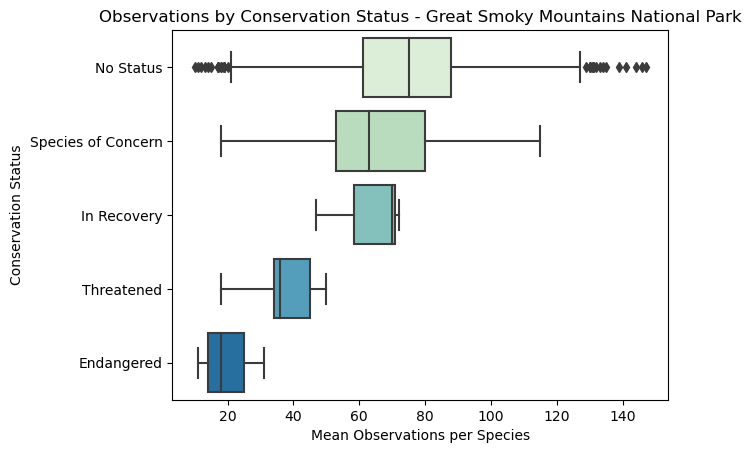

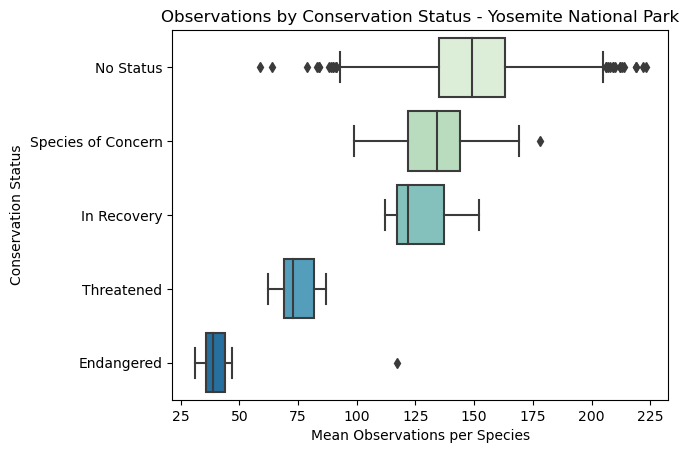

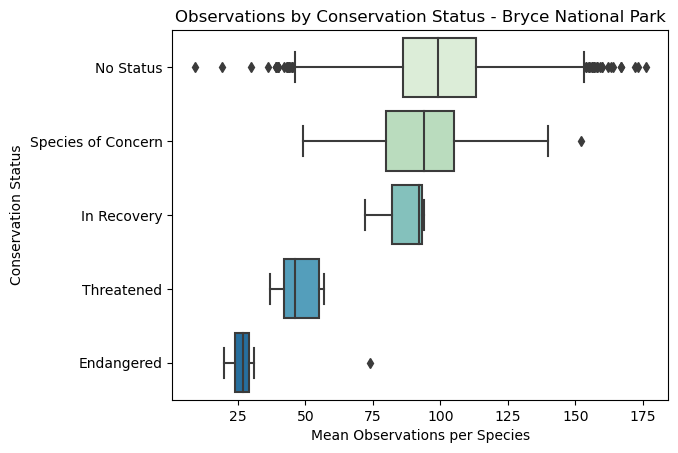

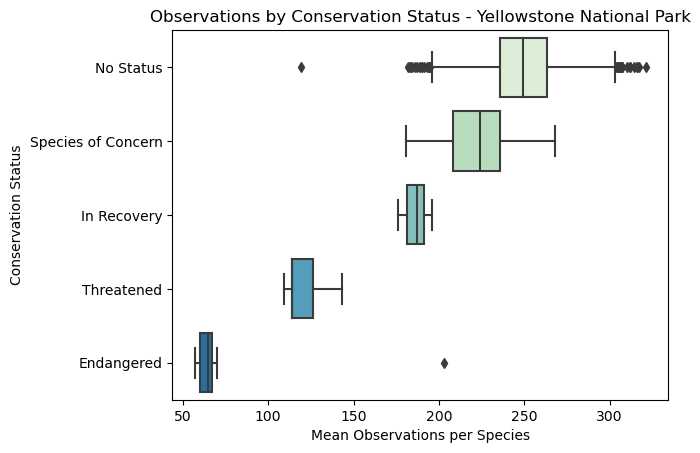

<Figure size 640x480 with 0 Axes>

In [19]:
#Next by park:
parks = df.park_name.unique()
for park in parks:
    
    sns.boxplot(data = df[df.park_name == '{park}'.format(park=park)], y = 'conservation_status', x = 'observations', order = ['No Status', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'])
    plt.title('Observations by Conservation Status - {park}'.format(park=park))
    plt.ylabel('Conservation Status')
    plt.xlabel('Mean Observations per Species')
    plt.show()
    plt.clf()

Conclusions: These also track pretty closely from park to park. Since there is not much variation either among categories or parks, it seems to suggest that the mean observations are one of the determining factors in a species conservation status. But I would still like to research this more.

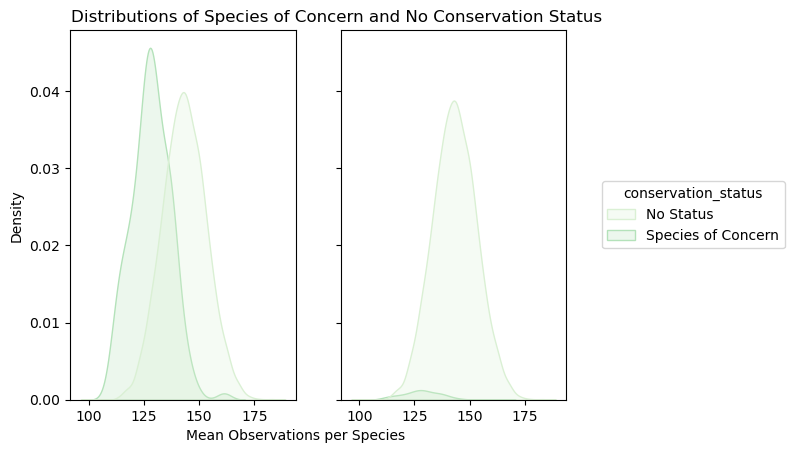

In [206]:
#Before moving on the 'No Status', let's look at the outliers, 
#focusing on those well within the distribution of 'Species of Concern'
f, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True)
sns.kdeplot(data = mean_obs[['scientific_name', 'observations', 'conservation_status']][mean_obs.conservation_status.isin(['No Status', 'Species of Concern'])], 
                  x = 'observations', 
                  hue = 'conservation_status', 
                  common_norm = False, 
                  fill = True,
                  ax = ax1,
                  legend= False                   
                   ).set(xlabel=None)
sns.kdeplot(data = mean_obs[['scientific_name', 'observations', 'conservation_status']][mean_obs.conservation_status.isin(['No Status', 'Species of Concern'])], 
                  x = 'observations', 
                  hue = 'conservation_status', 
                  common_norm = True, 
                  fill = True,
                  ax = ax2
                 )
plt.title('Distributions of Species of Concern and No Conservation Status', x = -.02)
plt.xlabel('Mean Observations per Species', x = -.2)
sns.move_legend(ax2, "center right", bbox_to_anchor=(2, .5))


Conclusions: There is a lot of overlap between these two distibutions. Looking the distributions with a common norm although there are very few species designated as 'Species of Concern" relative to the species without a status. Perhaps there are at least some species in the far left tail of the "No Status" distribution though that deserve further attention.

In [21]:
#Before moving on from "No Status", let's look at the species with the least number of mean obsevations:
no_status_outliers = mean_obs[mean_obs.conservation_status == 'No Status'].sort_values('observations').head(10)
no_status_outliers

,conservation_status,category,common_names,scientific_name,observations
566,No Status,Fish,Rainbow Trout,Oncorhynchus mykiss,101.625
350,No Status,Bird,Ovenbird,Seiurus aurocapilla,112.750
2667,No Status,Vascular Plant,False Aloe,Manfreda virginica,113.750
1097,No Status,Reptile,California (Western) Whiptail,Aspidoscelis tigris munda,114.000
2387,No Status,Vascular Plant,Cynanchum,Cynanchum laeve,114.000
1397,No Status,Vascular Plant,"Arrow Arum, Green Arrow-Arum",Peltandra virginica,114.750
3239,No Status,Vascular Plant,Jack In The Pulpit,Arisaema triphyllum ssp. triphyllum,115.000
4757,No Status,Vascular Plant,"Spreading Rockcress, Spreadingpod Rockcress",Arabis X divaricarpa,115.500
4389,No Status,Vascular Plant,Sea-Milkwort,Glaux maritima,115.750
1276,No Status,Vascular Plant,American Alpine Sweetvetch,Hedysarum alpinum var. americanum,116.000


Notes: Rainbow Trout is the biggest outlier by a large margin. The majority of them are in the Vascular Plant category. 

In [22]:
df[df.common_names == 'Rainbow Trout']

,scientific_name,park_name,observations,category,common_names,conservation_status
167,Oncorhynchus mykiss,Yosemite National Park,118,Fish,Rainbow Trout,No Status
925,Oncorhynchus mykiss,Bryce National Park,59,Fish,Rainbow Trout,No Status
3354,Oncorhynchus mykiss,Great Smoky Mountains National Park,61,Fish,Rainbow Trout,No Status
4649,Oncorhynchus mykiss,Yellowstone National Park,119,Fish,Rainbow Trout,No Status
8682,Oncorhynchus mykiss,Yellowstone National Park,253,Fish,Rainbow Trout,No Status
11893,Oncorhynchus mykiss,Bryce National Park,105,Fish,Rainbow Trout,No Status
15020,Oncorhynchus mykiss,Great Smoky Mountains National Park,39,Fish,Rainbow Trout,No Status
15239,Oncorhynchus mykiss,Yosemite National Park,59,Fish,Rainbow Trout,No Status


Notes: There are 2 data points for each park. Perhaps taken at different times. There is quite a large spread on the different between data points. This could be seasonal or relate to fishing or any number of other factors.

In [23]:
species.groupby('category').scientific_name.count()

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
Name: scientific_name, dtype: int64

Notes: By far the majority of the species overall fall into Vascular Plant category, so it makes sense that several are in this list of "no status" outliers.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


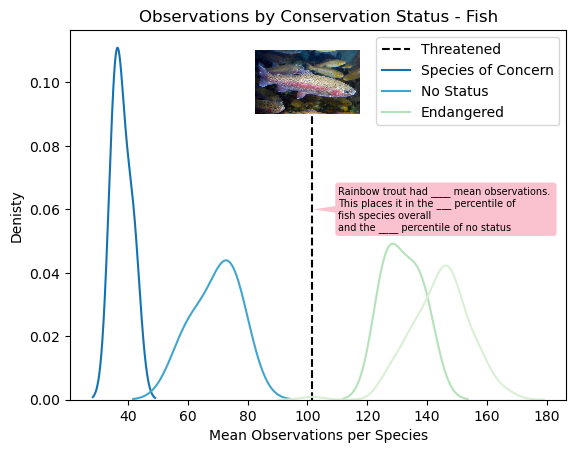

<Figure size 640x480 with 0 Axes>

In [288]:
#Before moving on let's show where these outliers are in the distribution of conservation statuses by category:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
img = plt.imread('rainbow_trout.jpg')
imagebox = OffsetImage(img, zoom = 0.15)
ab = AnnotationBbox(imagebox, (100,0.1), frameon = False)
ax = plt.subplot()
plt.title('Observations by Conservation Status - Fish')
plt.ylabel('Denisty')
plt.xlabel('Mean Observations per Species')
ax.vlines(x = 101.625, ymin = 0, ymax = .1, linestyle = '--', color = 'black')
fig = sns.kdeplot(data = mean_obs[mean_obs.category == 'Fish'], x = 'observations', hue = 'conservation_status', common_norm = False, hue_order = ['No Status', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'])
ax.legend(loc = 'center')
plt.annotate('''Rainbow trout had ____ mean observations. 
This places it in the ___ percentile of 
fish species overall 
and the ____ percentile of no status''' , 
            xy=(101, .06), xytext=(20, .10),
            textcoords='offset points',
            size=7, va="center",
            bbox=dict(boxstyle="round", fc="#f9c2ce", ec="None"),
            arrowprops=dict(arrowstyle="wedge,tail_width=2.",
                            fc="#f9c2ce", ec="none",
                            patchA=None,
                            patchB=None,
                            relpos=(.2, .5)))
sns.move_legend(fig, 'upper center')
plt.legend(['Threatened', 'Species of Concern', 'No Status', 'Endangered'])
ax.add_artist(ab)
plt.show()
plt.clf()

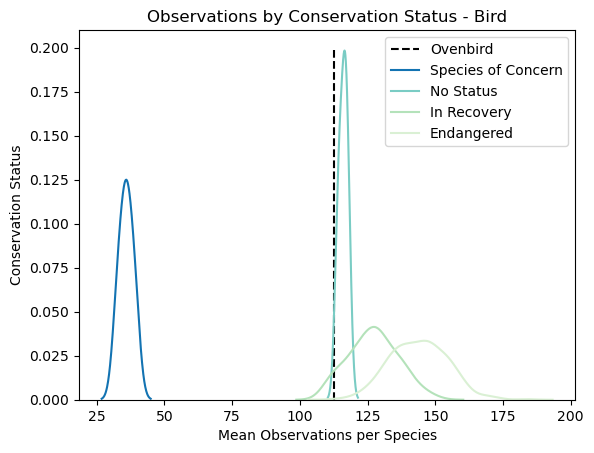

<Figure size 640x480 with 0 Axes>

In [25]:
ax = plt.subplot()
plt.title('Observations by Conservation Status - Bird')
plt.ylabel('Conservation Status')
plt.xlabel('Mean Observations per Species')
ax.vlines(x = 112.750, ymin = 0, ymax = .2, linestyle = '--', color = 'black', label = 'Ovenbird')
fig = sns.kdeplot(data = mean_obs[mean_obs.category == 'Bird'], x = 'observations', hue = 'conservation_status', common_norm = False, hue_order = ['No Status', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'])
ax.legend(loc = 'center')
sns.move_legend(fig, 'upper center')
plt.legend(['Ovenbird', 'Species of Concern', 'No Status', 'In Recovery', 'Endangered'])
plt.show()
plt.clf()

C:\Users\moorejd\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


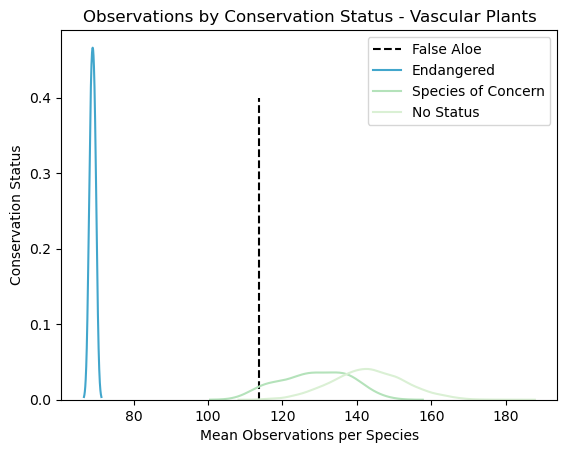

<Figure size 640x480 with 0 Axes>

In [26]:
ax = plt.subplot()
plt.title('Observations by Conservation Status - Vascular Plants')
plt.ylabel('Conservation Status')
plt.xlabel('Mean Observations per Species')
ax.vlines(x = 113.750, ymin = 0, ymax = .4, linestyle = '--', color = 'black', label = 'False Aloe')
fig = sns.kdeplot(data = mean_obs[mean_obs.category == 'Vascular Plant'], x = 'observations', hue = 'conservation_status', common_norm = False, hue_order = ['No Status', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'])
ax.legend(loc = 'center')
sns.move_legend(fig, 'upper center')
plt.legend(['False Aloe', 'Endangered', 'Species of Concern', 'No Status'])
plt.show()
plt.clf()

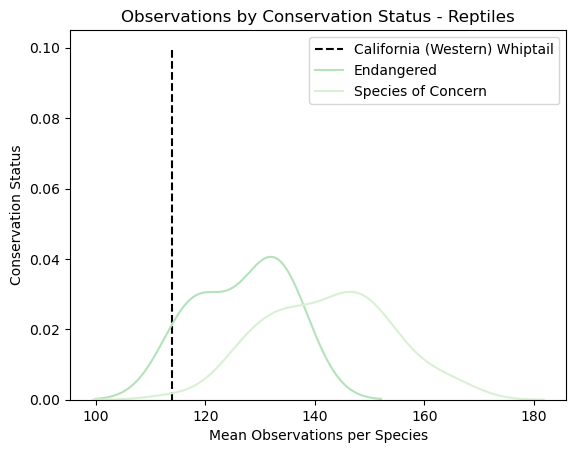

<Figure size 640x480 with 0 Axes>

In [27]:
ax = plt.subplot()
plt.title('Observations by Conservation Status - Reptiles')
plt.ylabel('Conservation Status')
plt.xlabel('Mean Observations per Species')
ax.vlines(x = 114.000, ymin = 0, ymax = .1, linestyle = '--', color = 'black', label = 'California (Western) Whiptail')
fig = sns.kdeplot(data = mean_obs[mean_obs.category == 'Reptile'], x = 'observations', hue = 'conservation_status', common_norm = False, hue_order = ['No Status', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'])
ax.legend(loc = 'center')
sns.move_legend(fig, 'upper center')
plt.legend(['California (Western) Whiptail', 'Endangered', 'Species of Concern', 'No Status'])
plt.show()
plt.clf()

Notes: Reptiles from the species in this data set are not endangered or threatened.

In [28]:
#Let's move to looking at species that are threatened and endangered. First let's see how many in each category there are:
df[df.conservation_status.isin(['Endangered', 'Threatened'])].groupby(['category', 'conservation_status']).scientific_name.count().reset_index()

,category,conservation_status,scientific_name
0,Amphibian,Endangered,4
1,Amphibian,Threatened,8
2,Bird,Endangered,16
3,Fish,Endangered,12
4,Fish,Threatened,12
5,Mammal,Endangered,32
6,Mammal,Threatened,8
7,Vascular Plant,Endangered,4
8,Vascular Plant,Threatened,8


It would be interesting to perform KMeans clustering on this dataset and see if it comes up with the same categories.